**IMPORTING YOUR DATASETS**

---
Download your datasets from here :
https://btsd.ethz.ch/shareddata/
Under the section for BelgiumTS for Classification (cropped images):	Both Training and Testing








**INSTALL TENSORFLOW 2 for Colab**

In [0]:
# Install tf 2.0 preview GPU version
!pip install tensorflow==2.0.0-beta1 

In [0]:
import tensorflow as tf


In [0]:
# Common Imports
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
#import tensorflow as tf

import random                               # for random sampling in range(),number_of_values

**CONNECTING TO YOUR GOOGLE DRIVE**

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


**CHANGE WORKING DIRECTORY TO UPLOADED FILES**

In [0]:

print(os.getcwd())
DATASET_PATH = """/gdrive/My Drive/Ml Datasets/Belgian Img Traffic Signs Datasets"""  # Insert Data Path here

os.chdir("../")
os.chdir(DATASET_PATH)
print(os.getcwd())

/gdrive
/gdrive/My Drive/Ml Datasets/Belgian Img Traffic Signs Datasets


**EXTRACT ZIP FILES IF NECESSARY**

In [0]:


#dataset_training = zipfile.ZipFile(io.BytesIO('BelgiumTSC_Training.zip') , 'r')


# Extracting Training Data
with zipfile.ZipFile('BelgiumTSC_Training.zip', 'r') as zipObj:
  zipObj.extractall('TrainingData')

  
# Extracting Testing Data
with zipfile.ZipFile('BelgiumTSC_Testing.zip', 'r') as zipObj:
  zipObj.extractall('TestingData')
print('SucessFully Extracted DataFiles!')

In [0]:
os.getcwd()

'/gdrive/My Drive/Ml Datasets/Belgian Img Traffic Signs Datasets'

LOADING DATA INTO PYTHON 

In [0]:
def load_images(data_directory):
  
  # lists to store Images and labels
  images = []
  labels = []
  log_index = 0
  # get list of all directories present in the data_directory path
  directories = [dir for dir in os.listdir(data_directory)
                 if os.path.isdir(os.path.join(data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
  print(len(directories))
  for dir in directories:
    current_directory = os.path.join(data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
    file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                  if file.endswith('.ppm')
                 ]
    
    # Load all given Images into the Images array
    for file in file_names:
      images.append(skimage.data.imread(file))
      labels.append(int(dir))
      log_index+=1
      # print('Loading File: {0}'.format(log_index))
  print('Successfully Loadded  {0} images!'.format(len(images)))
  return np.array(images),np.array(labels)





In [0]:
# LOAD IMAGES 
  
ROOT_PATH = os.getcwd()  
TRAININ_DATA_PATH = ROOT_PATH + '/TrainingData/Training'  
TEST_DATA_PATH = ROOT_PATH + '/TestingData/Testing'
  
training_images, training_labels = load_images(TRAININ_DATA_PATH)
print('Training Data Sucessfully Loaded!!')
testing_images,testing_labels = load_images(TEST_DATA_PATH)
print('Test data sucessfully loaded!!')


62
Successfully Loadded  4575 images!
Training Data Sucessfully Loaded!!
62
Successfully Loadded  2520 images!
Test data sucessfully loaded!!


**To Verify and get some facts about our Data**

In [0]:
index = 0                           # Replace the index to check out the shape of input images
print('Dimension of Image at index ' + str(index) + ':', training_images[index].shape)  
print('Number of training Images :' , training_images.size)
print('Number of Dimensions of Images array : ',training_images.ndim)                 # ndims - number of dimensions for np array images

print('Dimensions for labels :', training_labels.shape)
print('Label for Image at index ' + str(index) +': ',training_labels[index])
print('Number of Classes : ',len(set(training_labels)))

print('Some additional tidbits about the memory requirements of data ')
print('Size of an individual image: ' ,training_images.itemsize)

Dimension of Image at index 0: (74, 83, 3)
Number of training Images : 4575
Number of Dimensions of Images array :  1
Dimensions for labels : (4575,)
Label for Image at index 0:  1
Number of Classes :  62
Some additional tidbits about the memory requirements of data 
Size of an individual image:  8


# *VISUALIZING YOUR DATA*

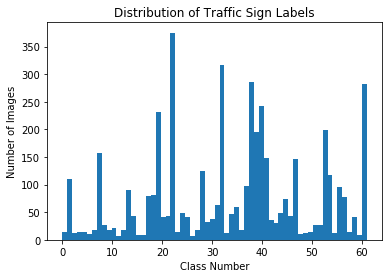

In [0]:
 # Plot your data distribuiton in accordance to the labels
  
  plt.hist(training_labels,len(set(training_labels)))
  plt.title('Distribution of Traffic Sign Labels')
  plt.xlabel('Class Number')
  plt.ylabel('Number of Images')
  plt.show()


**Visualizing Random Images from the dataset**

In [0]:
def print_random_images(images,labels,number_of_images_to_display,color_map = 'hsv'): 
  
  if number_of_images_to_display % 4 == 0:
    num_rows = number_of_images_to_display / 4
  else:
    num_rows = int(number_of_images_to_display / 4) + 1
  random_indices = [ np.random.randint(0,images.shape[0]) for n in range(number_of_images_to_display)]
  # print(random_indices)
  for counter in range(number_of_images_to_display):
    index = random_indices[counter]
    plt.subplot(num_rows, 4, counter + 1)
    #plt.axis('off')
    plt.imshow(images[index],cmap = color_map)
    plt.title('Class :{0}, Class Count: {1} '.format(labels[index],list(labels).count(labels[index])))   #np.count_nonzero(labels == labels[index])))
    plt.show()
    print('Image Dimensions: {0}, Min Pixel: {1}, Max Pixel: {2}'.format(images[index].shape,images[index].min(),images[index].max()))
    
    plt.subplots_adjust(wspace=1)
    
  
  


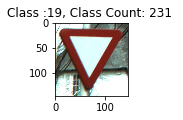

Image Dimensions: (147, 146, 3), Min Pixel: 1, Max Pixel: 255


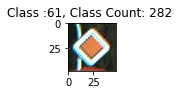

Image Dimensions: (48, 48, 3), Min Pixel: 0, Max Pixel: 255


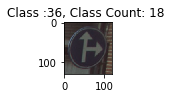

Image Dimensions: (129, 120, 3), Min Pixel: 28, Max Pixel: 138


<Figure size 432x288 with 0 Axes>

In [0]:
# View Random Images
print_random_images(training_images,training_labels,3)

# OBSERVATIONS ABOUT DATASET


1.   Unequal Image DImensions - Our Algorithms        need input images to be of the same                    dimensions
2.   62 Classes for our data
3.   Unequal Distribution of data


# STEPS TO DO NOW!

*  Select appropriate dimensions to rescale to
*   Rescale Images to have common dimensions









In [0]:
def image_dims(images):
  heights = []
  widths =  []
  min_height = images[0].shape[0] 
  min_width =  images[0].shape[1] 
  for img in images:
    heights.append(img.shape[0])
    widths.append(img.shape[1])
    if min_height > img.shape[0]:
      min_height = img.shape[0]
    if min_width  > img.shape[1]:
      min_width= img.shape[1]
  print('Min Height:',str(min_height))
  print('Min Width:',str(min_width))
  return heights,widths


In [0]:
def plot_dimensions(dimension, count,text = 'Dimension'):
  print('maximum amount of images with '+ text +' {0} := {1}'.format(list(dimension)[list(count).index(max(count))],max(count)))
  plt.scatter(list(dimension),count)
  plt.title("Image Height Distrbution")
  plt.xlabel('Dimension')
  plt.ylabel('Number of Images')
  plt.show()

Min Height: 22
Min Width: 20
maximum amount of images with Height 97 := 63


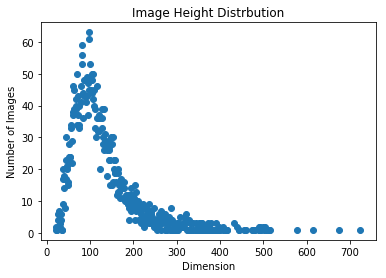

maximum amount of images with Width 84 := 58


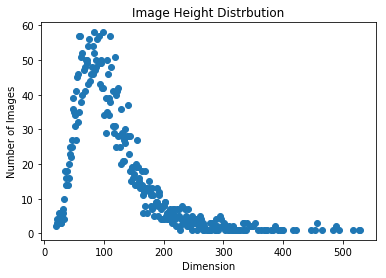

In [0]:
heights,widths = image_dims(training_images)
unique_heights = set(heights)
unique_widths = set(widths)

heights_count = [heights.count(num) for num in unique_heights]
widths_count = [widths.count(num) for num in unique_widths]

plot_dimensions(unique_heights,heights_count,'Height')
plot_dimensions(unique_widths,widths_count,'Width')

# SELECTING APPROPRIATE HEIGHT

.... Can be a little bit tricky so here we'll try out a few of them. 
First we see on average, that the Heights are concentrated around the value 200.... so we take the closes power of 2  ***128*** for our first run!

In [0]:
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return transformed_images


In [0]:
train_images128 = transform_images(training_images,128,128)


In [0]:
print(train_images128[0].shape)
train_images128 = np.array(train_images128)
print(train_images128.shape)
# View a few resized images
print_random_images(train_images128,training_labels,3)

NameError: ignored



Voila! Our images are now of the same shape!! Oooh and what's moer we don't need to normalize them anymore as the library does it for us!! You can see that the Pixel values are now fixed between 0 - 1

### **Now this is skippable depending on what you're going for... If it's classification the image color doesn't matter much. So we can go all grayscale!!      Skip this for other cases!!**

In [0]:
# we use the color module from skimage to change rgb to grayscale
# skimage.rgb2gray(input_image)

def convert_to_grayscale(images_array):
  return skimage.color.rgb2gray(images_array)

(128, 128)


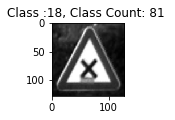

Image Dimensions: (128, 128), Min Pixel: 0.09155756938859538, Max Pixel: 1.0


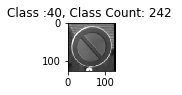

Image Dimensions: (128, 128), Min Pixel: 0.0, Max Pixel: 0.999329653894761


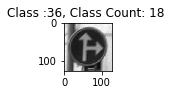

Image Dimensions: (128, 128), Min Pixel: 0.09155510085760378, Max Pixel: 0.6876259197639016


<Figure size 432x288 with 0 Axes>

In [0]:
train_images128_gray = convert_to_grayscale(train_images128)
print(train_images128_gray[0].shape)
print_random_images(train_images128_gray,training_labels,3,'gray')


### NOW FINALLY WE CAN START WITH TENSORFLOW AND MODELLING OUR NETWORK!

### Define the Model

### FIRST MODEL ( Minimum Viable Model)



In [0]:
# Define Placeholders for input values 
img = tf.compat.v1.placeholder(dtype = tf.float32,shape=[None,128,128])   # change shape depending on input values
label = tf.compat.v1.placeholder(dtype = tf.int32,shape=[None])

# We flatten the inputs to pass it to a dense layer
# from [None,128,128] to [None,128*128]  
img_flat = tf.compat.v1.layers.flatten(img)

# Our first layer is a simple dense layer
# Generates Logits of size [None,62]
logits = tf.compat.v1.layers.dense(img_flat,62,activation=tf.nn.relu)  # Attribs(input to layer,number of output classes(or number of nodes in layer),activation function)

# Our loss function cross entropy is a good loss function for classifiers
loss = tf.reduce_mean(input_tensor=tf.nn.sparse_softmax_cross_entropy_with_logits(labels = label,logits = logits))

# Our optimizer to optimize our loss function here we try to go for adam optimizer with a learning rate of 0-001
optimiser = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
prediction = tf.argmax(input=logits,axis=1)

# defining accuracy metric
accuracy = tf.reduce_mean(input_tensor=tf.cast(prediction,tf.float32))

init = tf.compat.v1.global_variables_initializer()


print("Images Flattened: ",img_flat)
print("Logits: ",logits)
print("Loss: ",loss)
print("Predicted Labels: ",prediction)


W0710 08:47:33.985058 139819795675008 deprecation.py:323] From <ipython-input-19-b6901c892d02>:10: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0710 08:47:33.987345 139819795675008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Images Flattened:  Tensor("flatten_1/Reshape:0", shape=(?, 16384), dtype=float32)
Logits:  Tensor("dense/Relu:0", shape=(?, 62), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Predicted Labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


### Train Model

**Running The Graph using *'WITH'* Keyword**


In [0]:
tf.compat.v1.set_random_seed(1234)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for i in range(201):
        _, loss_value = sess.run([optimiser, loss], feed_dict={img: train_images128_gray, label: training_labels})
        if i % 10 == 0:
            print('For epoch: {}, Loss Value: {}'.format(i,loss_value))


For epoch: 0, Loss Value: 4.275062561035156
For epoch: 10, Loss Value: 4.751593112945557
For epoch: 20, Loss Value: 3.3043296337127686
For epoch: 30, Loss Value: 3.1206769943237305
For epoch: 40, Loss Value: 3.0344021320343018
For epoch: 50, Loss Value: 2.980616569519043
For epoch: 60, Loss Value: 2.9400055408477783
For epoch: 70, Loss Value: 2.9096224308013916
For epoch: 80, Loss Value: 2.8853988647460938
For epoch: 90, Loss Value: 2.8654167652130127
For epoch: 100, Loss Value: 2.8476929664611816
For epoch: 110, Loss Value: 2.83150053024292
For epoch: 120, Loss Value: 2.8169188499450684
For epoch: 130, Loss Value: 2.8044331073760986
For epoch: 140, Loss Value: 2.793415069580078
For epoch: 150, Loss Value: 2.7835731506347656
For epoch: 160, Loss Value: 2.774684190750122
For epoch: 170, Loss Value: 2.7665929794311523
For epoch: 180, Loss Value: 2.759155035018921
For epoch: 190, Loss Value: 2.7522287368774414
For epoch: 200, Loss Value: 2.7457847595214844


## Start a new session and close it after  you do all activities!

In [0]:
# Train the model and check the loss
session = tf.compat.v1.Session()
# Step 1 initialize the variables in the computation graph
session.run([init])

# print([v.name for v in tf.global_variables()])
for i in range(201):
    lossval = session.run([optimiser,loss],
                          feed_dict={img: train_images128_gray,label: training_labels})
    if i % 20 == 0:
        print('For epoch: {}, Loss Value: {}'.format(i,lossval))
# session.close()  close once everything is done


For epoch: 0, Loss Value: [None, 4.1436114]
For epoch: 20, Loss Value: [None, 3.1984282]
For epoch: 40, Loss Value: [None, 2.761147]
For epoch: 60, Loss Value: [None, 2.6567295]
For epoch: 80, Loss Value: [None, 2.5996737]
For epoch: 100, Loss Value: [None, 2.5613885]
For epoch: 120, Loss Value: [None, 2.53175]
For epoch: 140, Loss Value: [None, 2.5076919]
For epoch: 160, Loss Value: [None, 2.487655]
For epoch: 180, Loss Value: [None, 2.4705968]
For epoch: 200, Loss Value: [None, 2.455772]


Lets check how our model performed on a set of Random images from the training set!

In [0]:

sample_indexes = random.sample(range(len(train_images128_gray)), 10)
sample_images = [train_images128_gray[i] for i in sample_indexes]
sample_labels = [training_labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted_values = session.run([prediction], feed_dict={img: sample_images})[0]

# Print the real and predicted labels
print(sample_labels)
print(predicted_values)


# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction_ss = predicted_values[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction_ss else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction_ss),
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()


NameError: ignored

**But this test only shows the performance of the model on the trained data. However to get a better insight into the performance of the model we need to look into new images from a similar distribution of data. Here comes the testingt set to ou rescue!!**

In [0]:
# TESING THE MODEL Performance

testing_images128 = [skimage.transform.resize(image,(128,128)) for image in testing_images]

testing_images128 = skimage.color.rgb2gray(np.array(testing_images128))

print(testing_images128.shape )

(2520, 128, 128)


In [0]:
predicted = session.run([prediction], feed_dict={img: testing_images128})[0]

match_count = sum([int(y == y_) for y, y_ in zip(testing_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(testing_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy * 100))

Accuracy: 56.111


Well that wasn't too bad now was it?   

**Let's collate the methods above to form a single method to create a single method to print everything else**


In [0]:
def create_and_run_mvp_model(train_images,train_labels,test_images,test_labels):

    tf.compat.v1.disable_eager_execution()
    print("--DEFINING MVP MODEL--")
    # find image dimensions
    train_dims = train_images.shape   # shape (number_of_images,height,width,channels ) channels may not be present


    # Define Placeholders for input values based on image dimensions
    if len(train_dims) == 3:
        img = tf.compat.v1.placeholder(dtype = tf.float32,shape=[None,train_dims[1],train_dims[2]])   # change shape depending on input values
    else:
        img = tf.compat.v1.placeholder(dtype = tf.float32,shape=[None,train_dims[1],train_dims[2],train_dims[3]])  # change shape depending on input values

    label = tf.compat.v1.placeholder(dtype = tf.int32,shape=[None])

    # We flatten the inputs to pass it to a dense layer
    # from [None,128,128] to [None,128*128]
    img_flat = tf.compat.v1.layers.flatten(img)

    # Our first layer is a simple dense layer
    # Generates Logits of size [None,62]
    logits = tf.compat.v1.layers.dense(img_flat,62,activation=tf.nn.relu)  # Attribs(input to layer,number of output classes(or number of nodes in layer),activation function)

    # Our loss function cross entropy is a good loss function for classifiers
    loss = tf.reduce_mean(input_tensor=tf.nn.sparse_softmax_cross_entropy_with_logits(labels = label,logits = logits))

    # Our optimizer to optimize our loss function here we try to go for adam optimizer with a learning rate of 0-001
    optimiser = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # Convert logits to label indexes
    prediction = tf.argmax(input=logits,axis=1)

    # defining accuracy metric
    accuracy = tf.reduce_mean(input_tensor=tf.cast(prediction,tf.float32))

    init = tf.compat.v1.global_variables_initializer()

    print("Images Tensor: ",img)
    print("Images Labels: ",label)
    print("Images Flattened: ",img_flat)
    print("Logits: ",logits)
    print("Loss: ",loss)
    print("Predicted Labels: ",prediction)


    # ------------------------------------------------------------
    print("--TRAINING MVP MODEL--")
    # Train the model and check the loss
    session = tf.compat.v1.Session()
    # Step 1 initialize the variables in the computation graph
    session.run([init])

    # print([v.name for v in tf.global_variables()])
    for i in range(201):
        lossval = session.run([optimiser,loss],feed_dict={img: train_images,label: train_labels})
        if i % 20 == 0:
            print('For epoch: {}, Loss Value: {}'.format(i,lossval))
    # session.close()  close once everything is done

    #=---------------------------------------------------------------------------

    print("--CHECKING RANDOM RESULTS FOR MVP MODEL--")
    sample_indexes = random.sample(range(len(train_images)), 10)
    sample_images = [train_images[i] for i in sample_indexes]
    sample_labels = [train_labels[i] for i in sample_indexes]

    # Run the "correct_pred" operation
    predicted_values = session.run([prediction], feed_dict={img: sample_images})[0]

    # Print the real and predicted labels
    print(sample_labels)
    print(predicted_values)


    # Display the predictions and the ground truth visually.
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(sample_images)):
        truth = sample_labels[i]
        prediction_ss = predicted_values[i]
        plt.subplot(5, 2,1+i)
        plt.axis('off')
        color='green' if truth == prediction_ss else 'red'
        plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction_ss),
                 fontsize=12, color=color)
        plt.imshow(sample_images[i],  cmap="gray")

    plt.show()


    #------------------------------------------------------

    # TESING THE MODEL Performance
    print("--TESTING MVP MODEL--")
    test_dims = test_images.shape                   # test dims must equal training img dimensions
    print("TESTING IMAGE DIMS LENGTH: {}  TRAINING IMAGE DIMS LENGTH: {}".format(len(test_dims),len(train_dims)))
    if len(test_dims) == len(train_dims):
        print("TEST IMAGES OK!")
        if len(test_dims) == 3:
            testing_img = [skimage.transform.resize(image,(test_dims[1],test_dims[2])) for image in test_images]
        else:
            testing_img = [skimage.transform.resize(image,(test_dims[1],test_dims[2],test_dims[3])) for image in test_images]

    # Change Images to grayscale if model trained on grayscale images/no channels
    if len(test_dims) == 3:
        testing_img = skimage.color.rgb2gray(np.array(testing_img))

    print("Testing Image Dimensions : {}".format(test_dims))

    test_predicted = session.run([prediction], feed_dict={img: testing_img})[0]

    match_count = sum([int(y == y_) for y, y_ in zip(test_labels, test_predicted)])

    # Calculate the accuracy
    accuracy = match_count / len(test_labels)

    # Print the accuracy
    print("Accuracy: {:.3f}".format(accuracy * 100))

    session.close()



NOW TO USE OUR CREATED MODEL LET'S READY OUR IMAGES AND FEED THEM TO THE MODEL

In [0]:
print(testing_images.shape)
print(training_images.shape)

training_images_128x128 = np.array(transform_images(training_images,128,128))
testing_images_128x128 = np.array(transform_images(testing_images,128,128))

print(training_images_128x128.shape)
print(testing_images_128x128.shape)


(2520,)
(4575,)
(4575, 128, 128, 3)
(2520, 128, 128, 3)


W0711 07:14:26.075479 140329086060416 deprecation.py:323] From <ipython-input-19-a84e7397b162>:19: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


--DEFINING MVP MODEL--


W0711 07:14:26.364673 140329086060416 deprecation.py:323] From <ipython-input-19-a84e7397b162>:23: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


Images Tensor:  Tensor("Placeholder:0", shape=(None, 128, 128, 3), dtype=float32)
Images Labels:  Tensor("Placeholder_1:0", shape=(None,), dtype=int32)
Images Flattened:  Tensor("flatten/Reshape:0", shape=(None, 49152), dtype=float32)
Logits:  Tensor("dense/Relu:0", shape=(None, 62), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Predicted Labels:  Tensor("ArgMax:0", shape=(None,), dtype=int64)
--TRAINING MVP MODEL--
For epoch: 0, Loss Value: [None, 4.196955]
For epoch: 20, Loss Value: [None, 14.269944]
For epoch: 40, Loss Value: [None, 3.1344523]
For epoch: 60, Loss Value: [None, 2.8065836]
For epoch: 80, Loss Value: [None, 2.7446444]
For epoch: 100, Loss Value: [None, 2.7169147]
For epoch: 120, Loss Value: [None, 2.6950107]
For epoch: 140, Loss Value: [None, 2.6790388]
For epoch: 160, Loss Value: [None, 2.6667]
For epoch: 180, Loss Value: [None, 2.657064]
For epoch: 200, Loss Value: [None, 2.649076]
--CHECKING RANDOM RESULTS FOR MVP MODEL--
[22, 7, 32, 22, 19, 19, 56

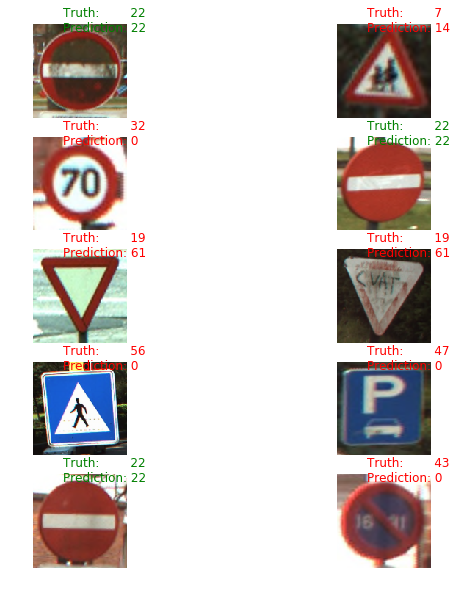

--TESTING MVP MODEL--
TESTING IMAGE DIMS LENGTH: 4  TRAINING IMAGE DIMS LENGTH: 4
TEST IMAGES OK!
Testing Image Dimensions : (2520, 128, 128, 3)
Accuracy: 30.714


In [0]:
create_and_run_mvp_model(train_images=training_images_128x128,train_labels=training_labels,test_images=testing_images_128x128,test_labels=testing_labels)


LET'S TRY TO CHANGE SOME PARAMTERS AND SEE HOW THE BASIC MODEL DOES!!


1.   Try Changing Image Dimensions to 64x64 instead of 128x128
2.   Then try with a 32x32 image and check how it affects the model



In [0]:
print(testing_images.shape)
print(training_images.shape)

training_images_64x64 = np.array(transform_images(training_images,64,64))
testing_images_64x64 = np.array(transform_images(testing_images,64,64))

print(training_images_64x64.shape)
print(testing_images_64x64.shape)

(2520,)
(4575,)
(4575, 32, 32, 3)
(2520, 32, 32, 3)


--DEFINING MVP MODEL--
Images Tensor:  Tensor("Placeholder_4:0", shape=(None, 32, 32, 3), dtype=float32)
Images Labels:  Tensor("Placeholder_5:0", shape=(None,), dtype=int32)
Images Flattened:  Tensor("flatten_2/Reshape:0", shape=(None, 3072), dtype=float32)
Logits:  Tensor("dense_2/Relu:0", shape=(None, 62), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Predicted Labels:  Tensor("ArgMax_2:0", shape=(None,), dtype=int64)
--TRAINING MVP MODEL--
For epoch: 0, Loss Value: [None, 4.230635]
For epoch: 20, Loss Value: [None, 2.4141586]
For epoch: 40, Loss Value: [None, 2.0509624]
For epoch: 60, Loss Value: [None, 1.8974744]
For epoch: 80, Loss Value: [None, 1.8028221]
For epoch: 100, Loss Value: [None, 1.7334445]
For epoch: 120, Loss Value: [None, 1.6790272]
For epoch: 140, Loss Value: [None, 1.63499]
For epoch: 160, Loss Value: [None, 1.598599]
For epoch: 180, Loss Value: [None, 1.5679959]
For epoch: 200, Loss Value: [None, 1.5419071]
--CHECKING RANDOM RESULTS FOR MVP MO

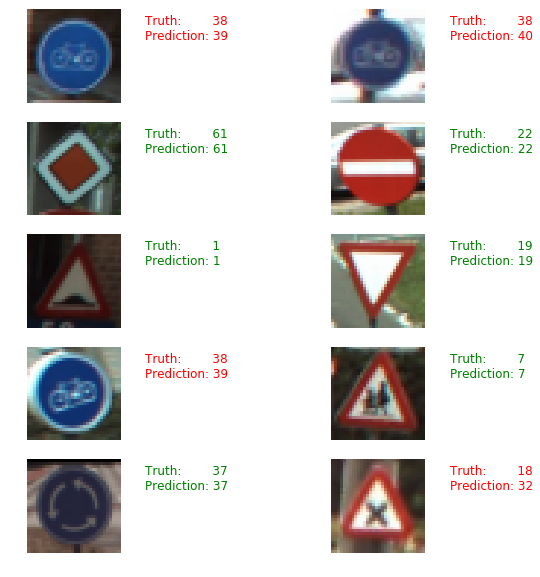

--TESTING MVP MODEL--
TESTING IMAGE DIMS LENGTH: 4  TRAINING IMAGE DIMS LENGTH: 4
TEST IMAGES OK!
Testing Image Dimensions : (2520, 32, 32, 3)
Accuracy: 55.437


In [0]:
create_and_run_mvp_model(train_images=training_images_64x64,train_labels=training_labels,test_images=testing_images_64x64,test_labels=testing_labels)